In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!git clone 'https://github.com/DataGlacier/DataSets.git'

Cloning into 'DataSets'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 12 (delta 1), reused 1 (delta 1), pack-reused 8
Unpacking objects: 100% (12/12), done.


In [9]:
%cd '/content/drive/MyDrive/DataSets'

/content/drive/MyDrive/DataSets


# **DATA WRANGLING**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [10]:
df_cab = pd.read_csv('Cab_Data.csv')
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [ ]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [11]:
T = df_cab['Date of Travel'].to_list()
date = pd.Timestamp('1899-12-29')
dates = [date + pd.DateOffset(date_offset) for date_offset in T]
df_cab['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

In [ ]:
df_cab['Date of Travel']

0        2016-01-07
1        2016-01-05
2        2016-01-01
3        2016-01-06
4        2016-01-02
            ...    
359387   2018-01-07
359388   2018-01-03
359389   2018-01-04
359390   2018-01-04
359391   2018-01-01
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]

In [ ]:
df_cab['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [13]:
df_cust = pd.read_csv('Customer_ID.csv')
df_cust.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [ ]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [12]:
df_trans = pd.read_csv('Transaction_ID.csv')
df_trans.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [ ]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [ ]:
df_trans['Payment_Mode'].value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

In [14]:
df_city = pd.read_csv('City.csv')
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [ ]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [15]:
df_city['Population'] = df_city['Population'].str.replace(',', '')
df_city['Population'] = df_city['Population'].astype(int)
df_city['Users'] = df_city['Users'].str.replace(',', '')
df_city['Users'] = df_city['Users'].astype(int)

In [ ]:
df_city['City'].unique()

array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
       'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ',
       'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA',
       'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA', 'PITTSBURGH PA',
       'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'], dtype=object)

In [ ]:
len(df_city['City'].unique())

20

In [16]:
df= df_cab.merge(df_trans, on= 'Transaction ID').merge(df_cust, on ='Customer ID').merge(df_city, on = 'City')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


In [99]:
len(df['Users'].unique())

19

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no

In [20]:
df.to_csv('merged_data.csv', index=False)

In [114]:
df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users,Profit,Year
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267,137.253198,2017.041693
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020,160.311840,0.801378
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000,-220.060000,2016.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000,28.012000,2016.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000,81.962000,2017.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000,190.030000,2018.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000,1463.966000,2018.000000


In [115]:
df_corr = df.corr(method='pearson')
df_corr

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users,Profit,Year
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,0.023868,0.013526,-0.087130,0.941475
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.002311,-0.000428,0.462768,-0.001094
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.326589,0.281061,0.864154,-0.036903
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.015108,0.023628,0.486056,-0.001766
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.647052,-0.610742,-0.306527,-0.002480
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.009002,-0.005906,-0.005093,-0.000497
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.011868,0.010464,0.006148,-0.001679
Population,0.023868,-0.002311,0.326589,0.015108,-0.647052,-0.009002,0.011868,1.000000,0.915490,0.544079,0.000061
Users,0.013526,-0.000428,0.281061,0.023628,-0.610742,-0.005906,0.010464,0.915490,1.000000,0.457758,-0.000556
Profit,-0.087130,0.462768,0.864154,0.486056,-0.306527,-0.005093,0.006148,0.544079,0.457758,1.000000,-0.061420


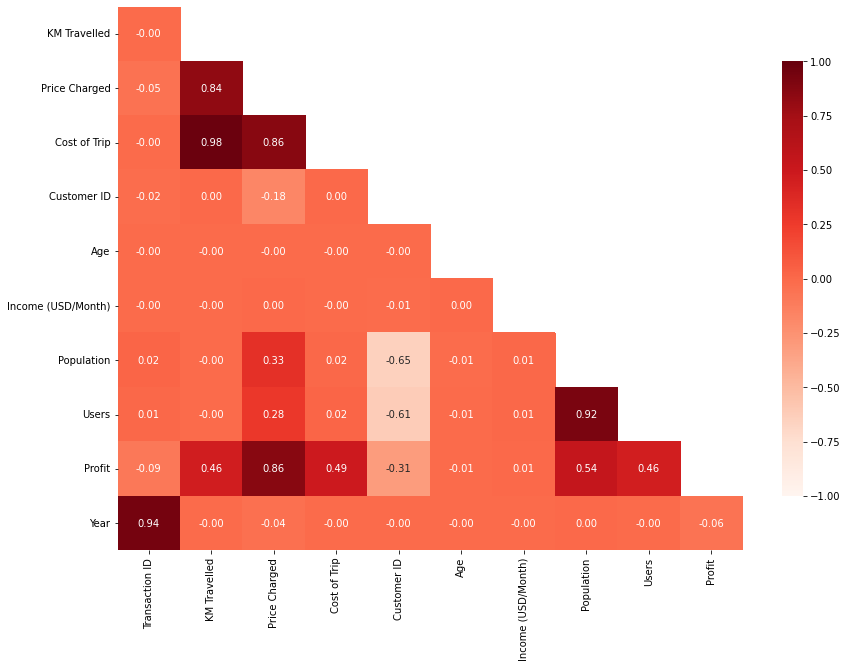

In [116]:
fig, ax = plt.subplots(figsize=(14, 10))

mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Reds',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})

plt.yticks(rotation=0)
plt.show()

# **EXPLORATORY DATA ANALYSIS**

---



In [18]:
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
df['Year'] = df['Date of Travel'].dt.year

In [117]:
df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Year
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150,2016
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772,2018
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480,2018
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660,2016
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-02,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001,143.6180,2018
359388,10319775,2018-04-12,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001,23.0464,2018
359389,10347676,2018-07-05,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001,-5.8540,2018
359390,10358624,2018-08-01,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001,-6.0900,2018


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/merged_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  int64  
 13  Users               359392 non-null  int64  
 14  Profit              359392 non-null  float64
 15  Year                359392 non-nul

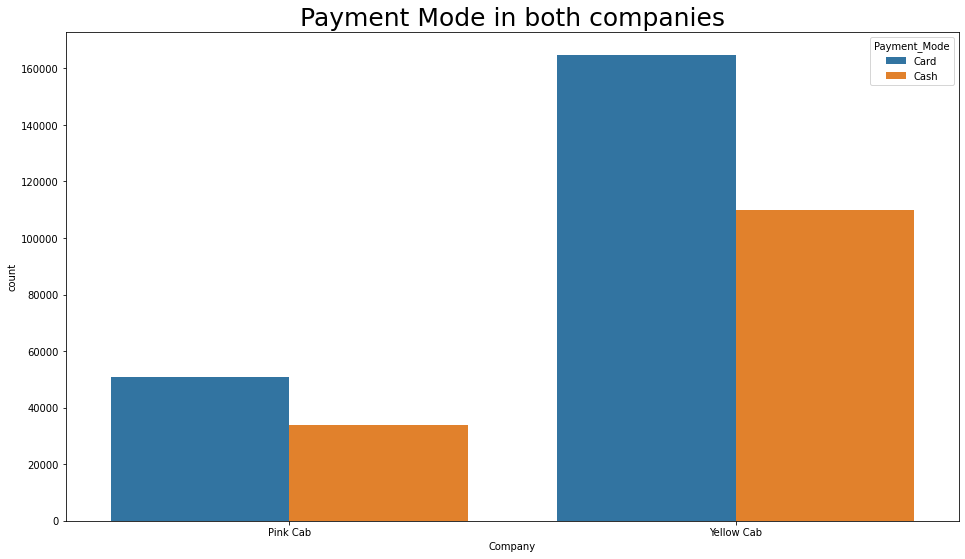

In [4]:
plt.figure(figsize = (16, 9))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=df)
plt.title('Payment Mode in both companies', fontsize=25)
plt.show()

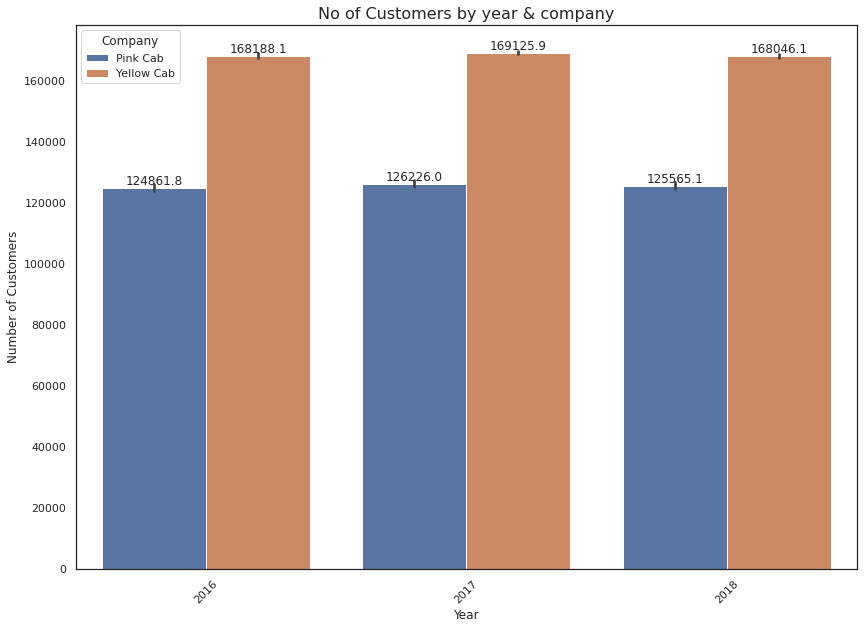

In [71]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(14, 10))

#create grouped bar chart
sns.barplot(x='Year', y='Users', hue='Company', data=df, ax=ax)
plt.title('No of Customers by year & company', fontsize=16)

#add axis titles
plt.ylabel('Number of Customers')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f')
#rotate x-axis labels
plt.xticks(rotation=45)
plt.show()

In [24]:
groupedvalues = df.groupby(['Company', 'City']).sum().reset_index()
groupedvalues.head()

,Company,City,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users,Profit,Year
0,Pink Cab,ATLANTA GA,18007031833,39715.17,532355.80,436305.724,50225532,62237,26488919,1435827370,43523162,96050.076,3554026
1,Pink Cab,AUSTIN TX,19117094048,41038.42,598572.71,451127.420,64471253,66636,27765238,1304557028,27978904,147445.290,3767860
2,Pink Cab,BOSTON MA,53017566077,117933.51,1558660.02,1296658.322,303456575,182462,79780279,1291148048,414988906,262001.698,10460389
3,Pink Cab,CHICAGO IL,95701629177,210726.13,2636186.14,2317463.652,42145344,333357,141004664,18301971930,1539584948,318722.488,18881588
4,Pink Cab,DALLAS TX,14100582137,30389.26,358835.40,334105.288,35197869,49441,20571216,1301213040,30576660,24730.112,2783524


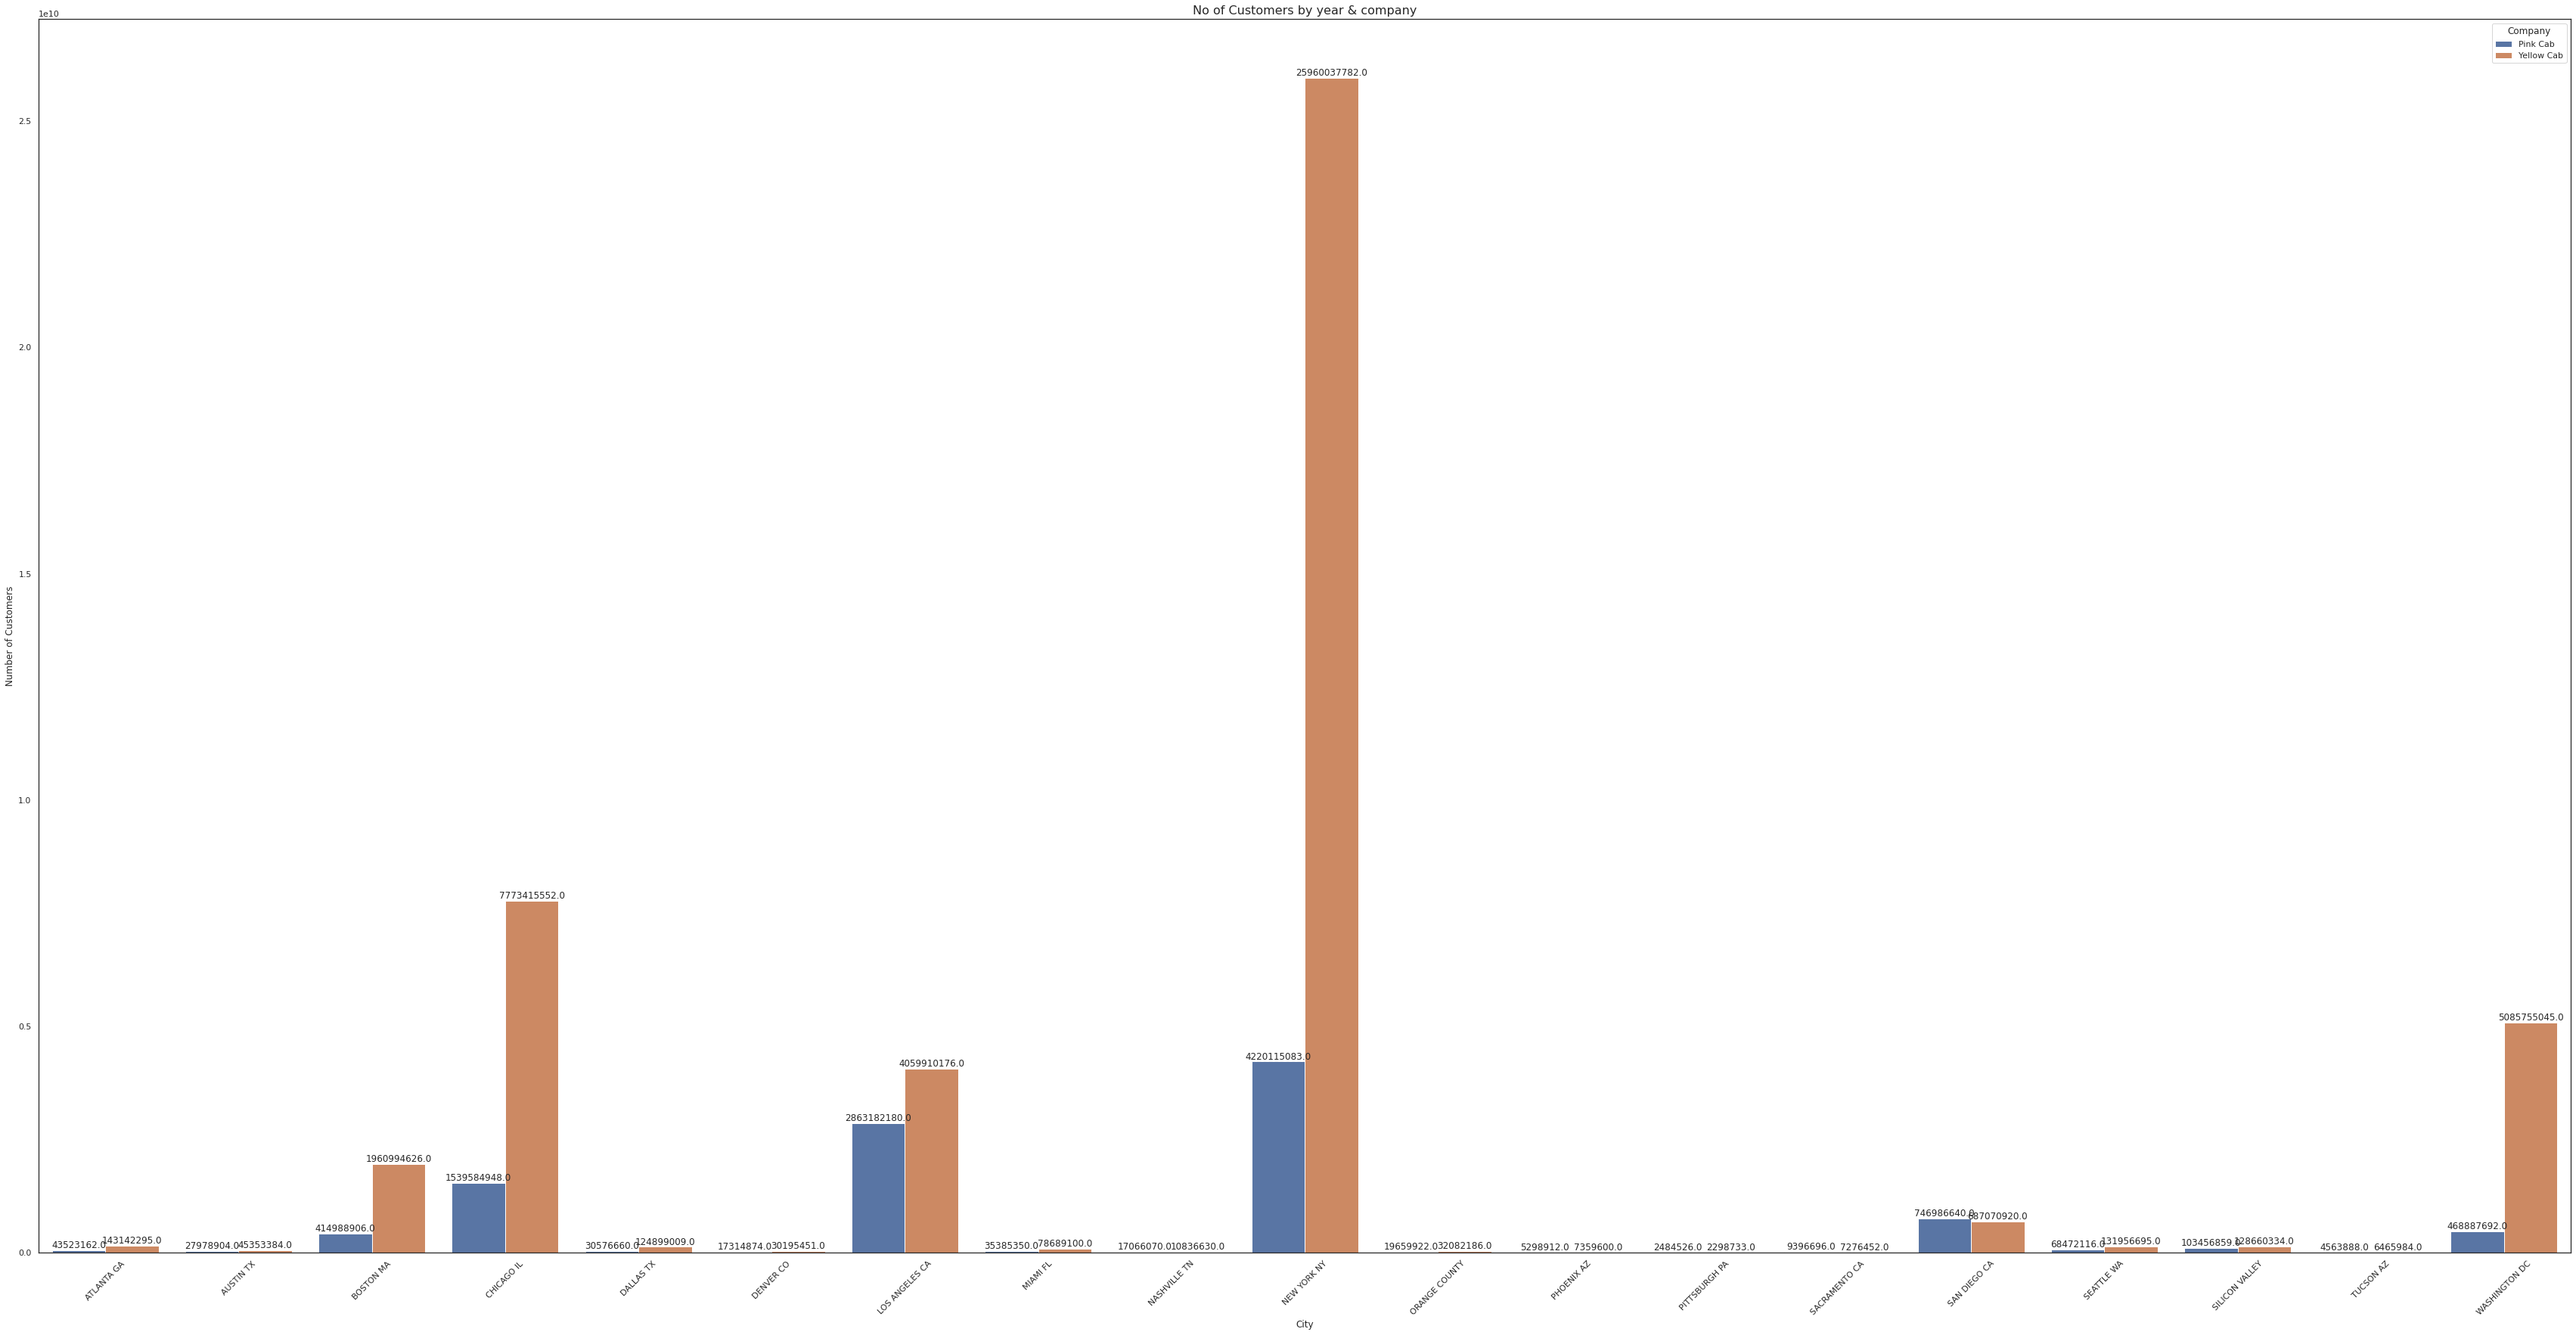

In [42]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(60, 30))

#create grouped bar chart
sns.barplot(x='City', y='Users', hue='Company', data=groupedvalues, ax=ax)
plt.title('No of Customers by city & company', fontsize=16)

#add axis titles
plt.ylabel('Number of Customers')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f')
#rotate x-axis labels
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.groupby(['City','Company']).sum().unstack().plot(kind='bar',y='Users', stacked=True, figsize=(25, 150))

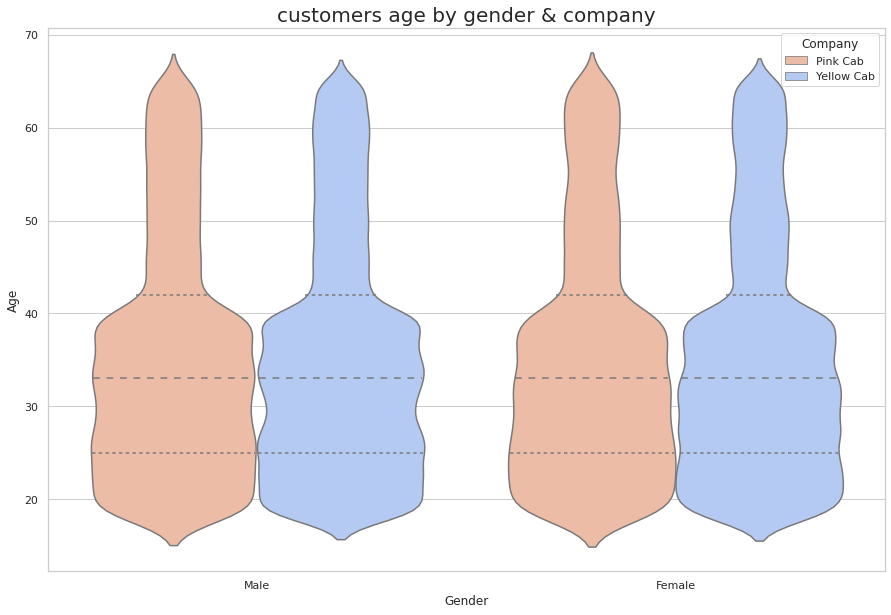

In [47]:
sns.set(style = 'whitegrid') 

plt.figure(figsize = (15, 10))

sns.violinplot(df['Gender'], df['Age'], hue = df['Company'], inner = 'quartiles',  palette = 'coolwarm_r')
plt.title('customers age by gender & company', fontsize=20)
plt.show()

In [48]:
df['Month'] = df['Date of Travel'].dt.month
df['Day'] = df['Date of Travel'].dt.day

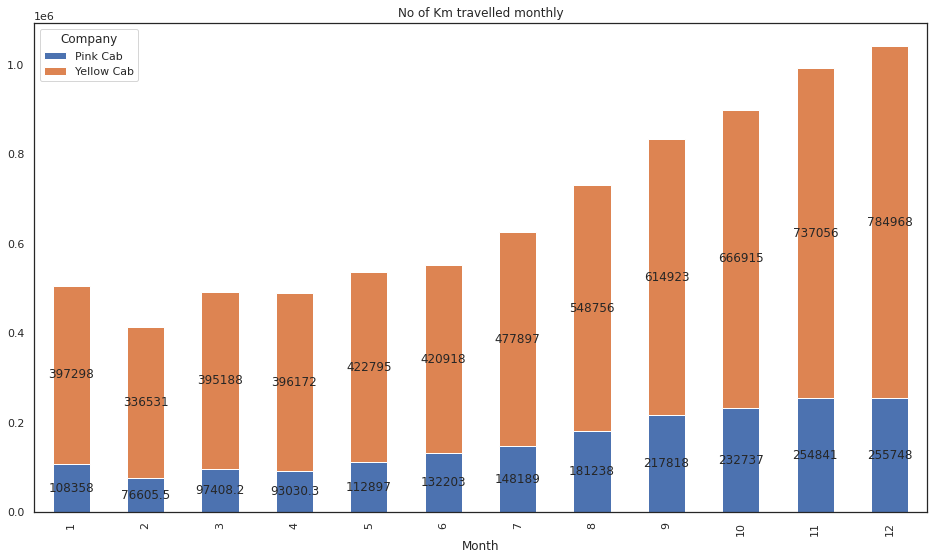

In [74]:
ax = df.groupby(['Month','Company']).sum().unstack().plot(kind='bar',y='KM Travelled', stacked=True, figsize=(16, 9), title='No of Km travelled monthly')
for c in ax.containers:
    ax.bar_label(c, label_type='center')

In [ ]:
df['day_name'] = \
pd.to_datetime(df['Date of Travel']).dt.day_name()

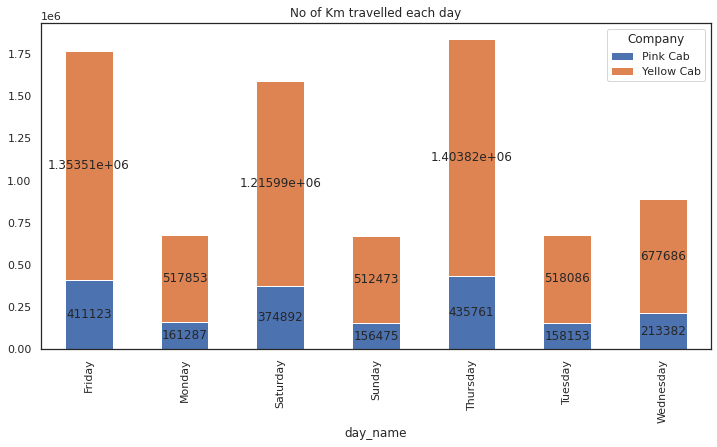

In [75]:
ax = df.groupby(['day_name','Company']).sum().unstack().plot(kind='bar',y='KM Travelled', stacked=True, figsize=(12, 6),title='No of Km travelled each day')
for c in ax.containers:
    ax.bar_label(c, label_type='center')

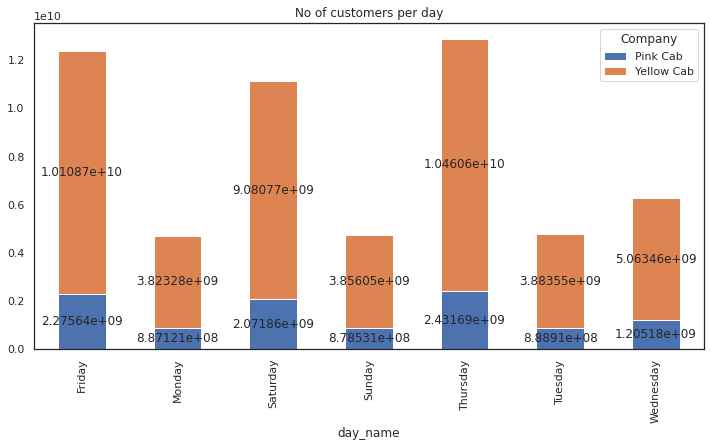

In [76]:
ax = df.groupby(['day_name','Company']).sum().unstack().plot(kind='bar',y='Users', stacked=True, figsize=(12, 6),title='No of customers per day')
for c in ax.containers:
    ax.bar_label(c, label_type='center')

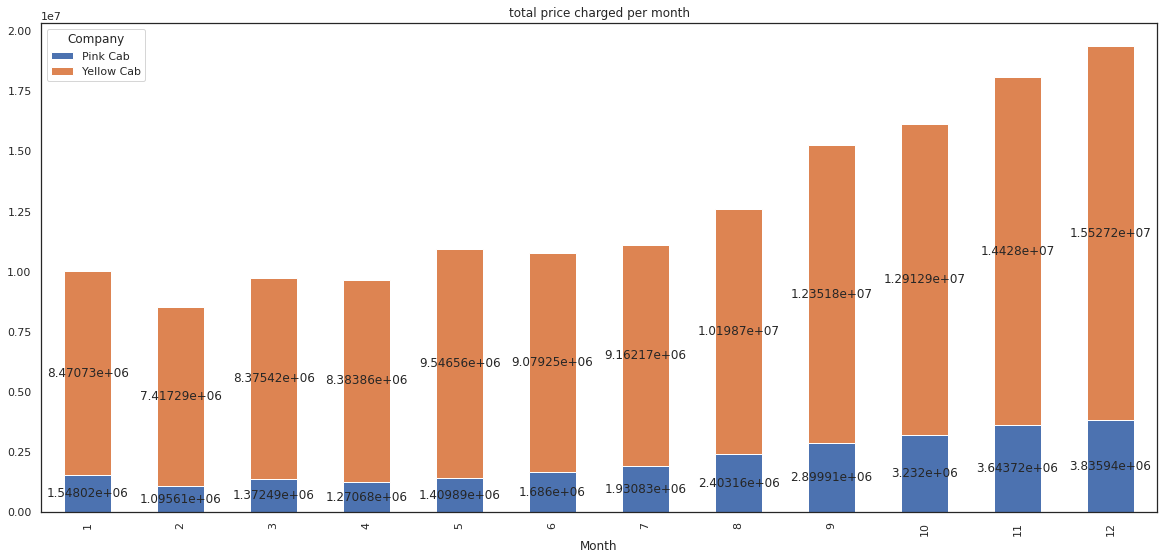

In [77]:
ax = df.groupby(['Month','Company']).sum().unstack().plot(kind='bar',y='Price Charged', stacked=True, figsize=(20, 9),title='total price charged per month')
for c in ax.containers:
    ax.bar_label(c, label_type='center')

In [ ]:
ax = sns.barplot(x="Payment_Mode", y="Profit", data=df, hue='Company')

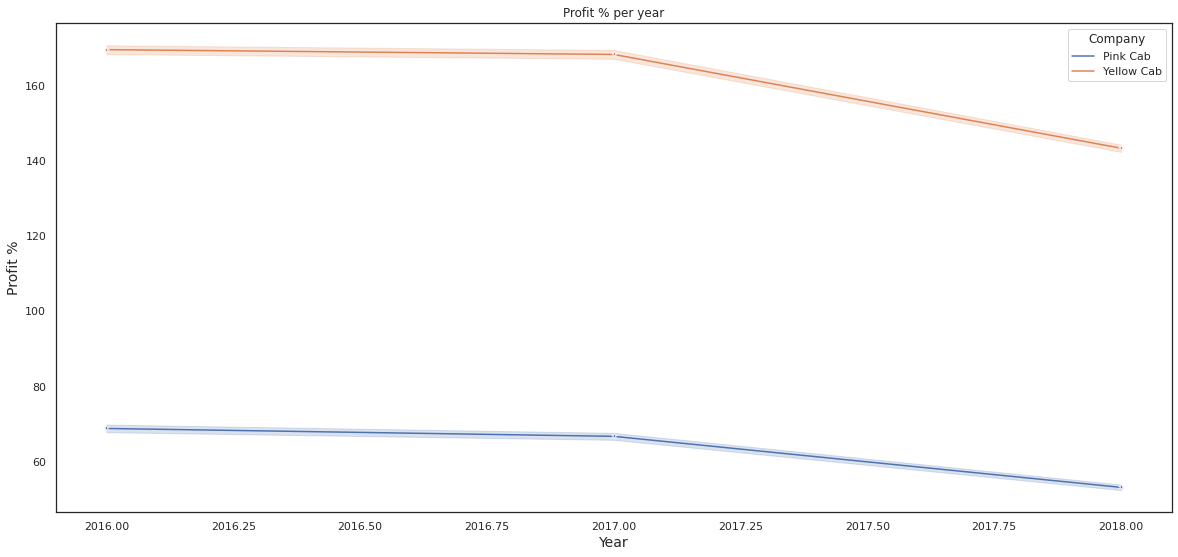

In [80]:
plt.figure(figsize = (20, 9))
sns.lineplot(x='Year', y='Profit', hue="Company", data=df, marker='*')
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year")
plt.show()

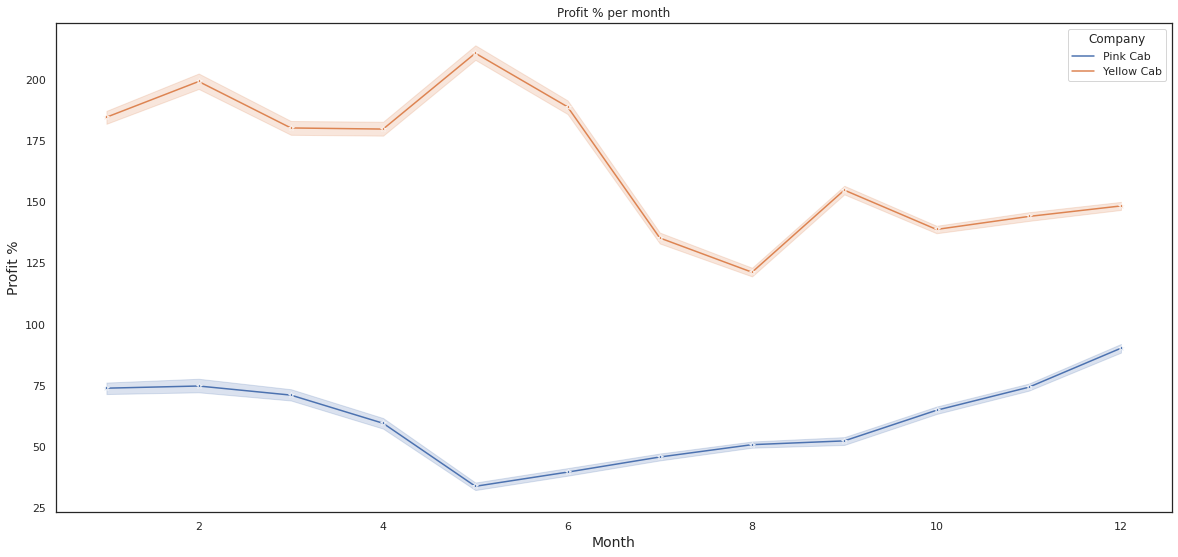

In [81]:
plt.figure(figsize = (20, 9))
sns.lineplot(x='Month', y='Profit', hue="Company", data=df, marker='*')
plt.xlabel("Month", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per month")
plt.show()

# **HYPOTHESIS TESTING**

***Which feautures have a impact on profit variable?***

*Based on the heatmap displayed above we found that there is a strong linear relationship between profit and price charged with r=0.86.
Now let's calculate the p-value of the **pearson test** to decide which hypothesis to accept.*

**H0** : there is no linear relationship between the two variables.

**H1** : there is a linear relationship between the two  variables. 

In [82]:
from scipy.stats.stats import pearsonr
from scipy import stats

#calculation correlation coefficient and p-value between x and y
pearsonr(df['Price Charged'], df['Profit'])

(0.864153946750663, 0.0)

Since the **p-value = 0.0<0.05** so we reject the null hypothesis and accept the alternative hypothesis that states that there is a linear relationship between profit and price charged(when one increase the other increase too and vise verca)

*Now let's move the categorical variables :*

**Does profit differe based on gender?**

*For that we will run **t-test** because we want to compare only two groups (male and female) and because one is categorical and the other is numerical*

*Lets set the hypothesis*:

**H0** : there is no difference between the groups in profit.

**H1** : there is a difference between the groups in profit 

In [83]:
from scipy import stats

x = df[(df.Gender=='Male')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
y = df[(df.Gender=='Female')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
_, p_value = stats.ttest_ind(x.values,
                             y.values,
                             equal_var=True)

print('P value = ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that states that there is a difference between male and female in profit for Pink Cab')
else:
    print('We accept null hypothesis (H0) that  states that there is no difference between male and female in profit for Pink Cab')

P value =  0.11515305900425798
We accept null hypothesis (H0) that  states that there is no difference between male and female in profit for Pink Cab


In [84]:

x = df[(df.Gender=='Male')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
y = df[(df.Gender=='Female')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
_, p_value = stats.ttest_ind(x.values,
                             y.values,
                             equal_var=True)

print('P value = ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that states that there is a difference between male and female in profit for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that  states that there is no difference between male and female in profit for Yellow Cab')

P value =  6.060473042494144e-25
We accept alternative hypothesis (H1) that states that there is a difference between male and female in profit for Yellow Cab


**Does profit differe based on age?**

In [85]:
x = df[(df.Age <= 40)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
y = df[(df.Age >= 40)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
_, p_value = stats.ttest_ind(x.values,
                             y.values,
                             equal_var=True)

print('P value = ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab')

P value =  0.09093510590632374
We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab


In [86]:
a = df[(df.Age <= 40)&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Age >= 40)&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value = ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for yellow Cab')

P value =  0.44246196729249976
We accept null hypothesis (H0) that there is no difference regarding age for yellow Cab
